<a href="https://colab.research.google.com/github/OfEarthAndEther/ML_monologues/blob/main/Linear_Regression_Self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Implementattion (Krish-Naik)

In [ ]:
!pip



Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  lock                        Generate a lock file.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible 
dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package 
indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of packa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [ ]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)

In [ ]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
## Independent Features & dependent features
X=dataset
y=housing.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, Y_train, X_test, Y_test=train_test_split(X, y, test_size=0.30, random_state=42)

The reason you're getting that ValueError is actually because of the order in which you assigned the variables during your train_test_split.

The Issue: Unpacking Order
In your code (Cell 19), you have:
X_train, Y_train, X_test, Y_test = train_test_split(X, y, ...)

Scikit-learn’s train_test_split function always returns the data in a specific order: Features first, then Targets. Specifically:

X_train (Training Features)

X_test (Testing Features)

y_train (Training Targets)

y_test (Testing Targets)

Because you swapped the middle two, your variable named X_test is currently holding y_train (the target vector). Since targets like housing prices are 1D arrays, the StandardScaler throws a fit because it expects a 2D matrix of features.

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
## Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Think of your Training Set as the past (everything the model is allowed to know) and your Test Set as the future (completely unseen information).

1. fit_transform(X_train)
    - This method does two things sequentially:
      - fit(): It calculates the necessary parameters from the data. For a standard scaler, it calculates the Mean ($\mu$) and Standard Deviation ($\sigma$) of the training data.
      - transform(): It applies the formula $\frac{x - \mu}{\sigma}$ to the training data to scale it.

2. transform(X_test)
    - This method does only one thing:
      - It scales the test data using the exact same Mean and Standard Deviation that were calculated from the training set.

**Why not fit_transform on the Test Set?**

If you were to fit_transform your test data, the scaler would calculate a new mean and standard deviation specific to those test samples. This is a mistake for two reasons:

**Data Leakage**: Your model would be getting "hints" about the distribution of the test set (the future). In a real-world scenario, you won't have the whole "test set" at once; you might just have one single data point. You must treat that point using the rules you learned from your training data.

**Inconsistency**: If the training data is scaled based on a mean of 50, but the test data is scaled based on its own mean of 70, the "value" of a scaled 0.5 means two different things to the model. It would be like measuring the training group in centimeters and the test group in inches—the model will be completely confused.

**The Golden Rule**

**Fit only on training data. > Transform both training and test data using those parameters.**

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
## Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
cross_val_score(logreg, X, y, scoring='neg_mean_squared_error', cv=20)

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1201, in fit
    check_classification_targets(y)
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.



Gemini said
It looks like you've run into a mismatch between your data and your model. You are using the California Housing dataset, which is a regression problem (predicting continuous house values), but you've initialized a Logistic Regression model, which is only for classification (predicting discrete categories).

Here is the breakdown of why this is failing and how to fix it:

The Core Conflict
The Data: You are fetching fetch_california_housing, where the target (y) consists of continuous numerical values representing house prices.

The Model: You initialized LogisticRegression(). Despite its name, Logistic Regression is a classifier. It expects the target values to be classes (like 0 or 1, "Yes" or "No").

The Error: When you run cross_val_score, the model tries to treat those continuous house prices as individual "classes." Since there are likely thousands of unique price values, the model fails to find enough samples for each "class" to train properly, leading to the "20 fits failed" error.

**The Fix: Switch to Linear Regression**

1. Update your imports and model initialization:

In [ ]:
# 1. Update your imports and model initialization:
from sklearn.linear_model import LinearRegression

# Replace LogisticRegression with LinearRegression
lin_reg = LinearRegression()

2. Run the Cross-Validation again:
Keep in mind that for regression, a negative MSE is standard because Scikit-learn's scoring API follows the convention that "higher is better" (so it negates the error).

In [ ]:
from sklearn.model_selection import cross_val_score

# Use the scaled features (X_train) and the correct target (Y_train)
mse_scores = cross_val_score(lin_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

# To see the actual Mean Squared Error:
mean_mse = -mse_scores.mean()
print(f"Mean MSE: {mean_mse}")

Mean MSE: 0.5268253746355749


That is a very respectable score for the California Housing dataset!

An MSE of around 0.5268 means that, on average, your model's predictions are off by the square root of that value in terms of the target variable.Here is how to interpret that number and what to do next:
  1. Understanding the Error (Root Mean Squared Error)
  - Since MSE is in "squared" units, it’s hard to visualize. To get the error back into the original scale (which, for this dataset, is in units of $100,000s), you should calculate the RMSE:
  
  $$\text{RMSE} = \sqrt{0.5268} \approx 0.7258$$

  - Interpretation: Your model's predictions are, on average, off by approximately 72,580
  (since the target is in units of $100,000).
  
  2. Checking for OverfittingNow that you have your cross-validation MSE (0.5268), you should compare it to the MSE on your Training Set.
  - If Training MSE $\approx$ Cross-Val MSE: Your model is well-generalized.
    
  - If Training MSE $\ll$ Cross-Val MSE: Your model is overfitting (memorizing the training data but failing on new data).
  
  3. The Next Logical Step: R-squared ($R^2$) ScoreWhile MSE tells you the magnitude of error, the $R^2$ score tells you the quality of the model. It represents the proportion of variance in the house prices that your model actually explains.

In [ ]:
from sklearn.metrics import r2_score

# Assuming you've fitted your model: lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
print(f"R2 Score: {r2_score(Y_test, Y_pred)}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

1. Fixing the NotFittedError
The error message NotFittedError: This LinearRegression instance is not fitted yet occurs because cross_val_score is a "hands-off" tool. It splits, fits, and evaluates the model internally, but it does not leave the lin_reg object in a "fitted" state for you to use later.

To fix this, you must explicitly fit the model on your training data before calling **.predict()**:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Initialize the model
lin_reg = LinearRegression()

# 2. Fit the model (This is the missing step!)
lin_reg.fit(X_train, Y_train)

# 3. Now you can predict and calculate R2
Y_pred = lin_reg.predict(X_test)
print(f"R2 Score: {r2_score(Y_test, Y_pred)}")

R2 Score: 0.5957702326061665


Let's get that visualization set up. A Residual Plot is one of the most powerful tools for a regression task because it reveals patterns in your errors that a single number like MSE or $R^2$ cannot.
1. Generating the Residual PlotRun the following code to see where your model is "missing the mark":

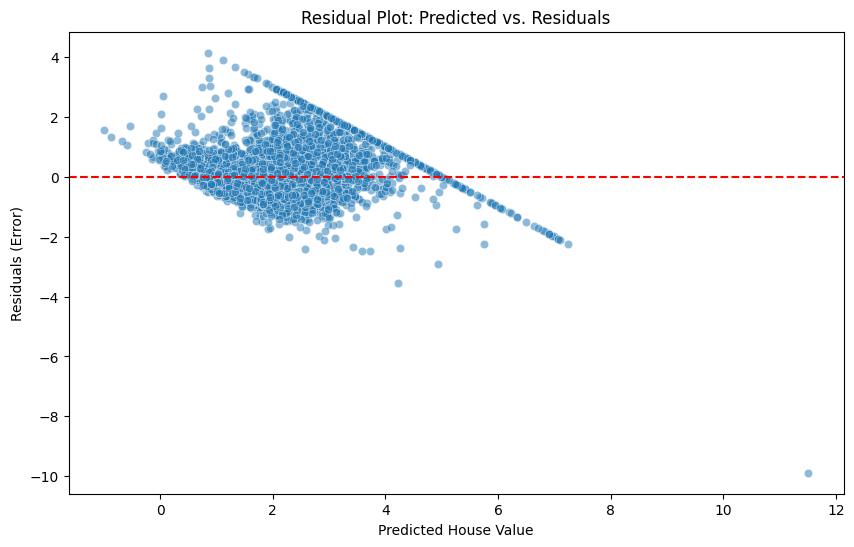

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have predictions from your fitted model
Y_pred = lin_reg.predict(X_test)
residuals = Y_test - Y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals (Error)')
plt.show()

**Analyzing Your Residual Plot**

The plot shows several key characteristics that explain why your MSE is around 0.5268:

- **The Diagonal "Cap" Line**:
  - Notice the very clear diagonal line of points at the top right. This happens because house prices in this dataset are capped at 5.0 ($500,000).

  - Your Linear Regression model is predicting values higher than 5.0, but since the actual value is exactly 5.0, the error (Residual = Actual - Predicted) creates that straight diagonal slope.

- **Heteroscedasticity**: You can see a "fan" or "funnel" shape where the spread of residuals increases as the predicted value increases. This confirms that the model is more accurate for cheaper homes and struggles with the high-variance nature of expensive real estate.

- **Extreme Outlier**: There is a single point at the far bottom right (Predicted $\approx$ 11.5, Residual $\approx$ -10). This is a massive over-prediction that is likely pulling your MSE higher.

1. The Horizontal Line (The "Zero" Error)The red dashed line represents where the error is exactly zero—meaning your prediction perfectly matched the actual house price.Points above the line: The actual price was higher than you predicted (Under-estimation).Points below the line: The actual price was lower than you predicted (Over-estimation).
2. The Diagonal Edge (The "Capped" Data)Notice the sharp diagonal boundary forming the top-right edge of the cluster.The Cause: In the California Housing dataset, house values are "censored" or capped at 5.0 ($500,000).

  - The Analysis: When the model predicts a value like 6.0 for a house that is actually capped at 5.0, the residual is $5.0 - 6.0 = -1.0$. As the predictions (X-axis) get higher, the maximum possible residual (Y-axis) gets lower in a straight line. This tells us the model is struggling because the data itself has an artificial limit.
3. The "Funnel" Shape (Heteroscedasticity)
If you look at the spread of dots from left to right, they start in a tight cluster near 0 and 1 on the X-axis, but as you move toward 4 and 5, the dots spread out much further vertically.The Analysis: This "funnel" means your model is very confident and accurate for low-cost housing but becomes increasingly "clueless" or inconsistent as house prices rise. Linear Regression assumes the error is the same across all prices; this plot proves that assumption is wrong for this dataset
4. The Outlier at the Bottom RightThere is one lone dot sitting all the way at the bottom right corner (Predicted value $\approx$ 11.5, Residual $\approx$ -10).
  - The Analysis: For some reason, the model predicted this house would cost
$1.15 million
  
(11.5), but the actual price was very low. This single "bad guess" has a massive impact on your MSE because the error (-10) gets squared ($(-10)^2 = 100$), which single-handedly inflates your total error score.

## Naïve Method vs. Vectorization
- The Naïve Way (Loops): Uses a for loop to iterate through each element $elt$ in a vector $W$ and add it to a running sum.
- The Vectorized Way: Expresses the operation as a single mathematical instruction. For example, the sum of all elements in vector $W$ can be calculated as the dot product of $W$ and a vector of ones ($V$):

$$1^T W = \sum W_i$$


#### Performance and Efficiency
The primary motivation for vectorization is computational speed, especially as the number of observations grows.

- **Computational Time**: As the number of observations increases, the time taken by a standard Python loop grows exponentially compared to Vectorized or Scikit-learn methods.

- **SIMD (Single Instruction, Multiple Data)**: Modern CPUs and GPUs use hardware-level vectorization to perform the same operation on multiple data points simultaneously, which is why libraries like NumPy are significantly faster than native Python loops.

#### Challenges in Vectorization
While powerful, vectorization introduces challenges related to the "physical" meaning of the data coordinates.

- **Scale and Unit Variance**: Different coordinates (features) in your vector may have widely different scales. For instance, measuring weight in kilograms versus grams results in multiplicative changes to the data values.

- **Transformation Classes**: Representing the same physical property (like temperature) in Celsius, Kelvin, or Fahrenheit requires different mathematical transformations, which can confuse a model if not standardized.

Since you're currently working with the California Housing dataset, a perfect example is the manual calculation of Mean Squared Error (MSE). This is exactly the kind of operation where the "naïve" way slows down your notebook as your dataset grows.

The "Naïve" Way **(Python Loops)**
In this version, we iterate through every single house prediction one by one. If you have 20,000 houses, Python has to stop and perform 20,000 individual subtractions, multiplications, and additions.

In [ ]:
import time

# Simulation of 20,000 predictions
y_true = Y_test
y_pred = lin_reg.predict(X_test)

# Naïve loop approach
start = time.time()
loop_res = 0
for i in range(len(y_true)):
    error = y_true[i] - y_pred[i]
    loop_res += error**2
mse_loop = loop_res / len(y_true)
end = time.time()

print(f"Loop Time: {end - start:.5f} seconds")

Loop Time: 0.00491 seconds


**The Vectorized Way (NumPy)**
Instead of telling the computer how to loop, we tell it what to do to the entire array at once. This allows the **CPU to use SIMD** (Single Instruction, Multiple Data) to **process blocks of numbers in parallel**.

In [ ]:
import numpy as np

# Vectorized approach
start = time.time()
mse_vectorized = np.mean((y_true - y_pred)**2)
# Or using the dot product as shown in your slides
# error = y_true - y_pred
# mse_dot = np.dot(error, error) / len(y_true)
end = time.time()

print(f"Vectorized Time: {end - start:.5f} seconds")

Vectorized Time: 0.00040 seconds


## Linear Regression Assumptions
1. Linear Relationship (in the i/p and o/p)
2. MultiColinearity
3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_new = pd.read_csv('/content/sample_data/data_calories.csv')
dataset = df_new.head()

In [6]:
dataset

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [9]:
X = df_new.iloc[:,0:3].values
y = df_new.iloc[:,-1].values

1. Assigning Features ($X$)
    - ```X = df.iloc[:, 0:3].valuesiloc``` : Stands for "integer-location."
    - It allows you to select data by their numerical index (0, 1, 2...) rather than their column names.
    - ```:``` (Before the comma): This tells Pandas to select all rows in the dataset.
    - ```0:3``` (After the comma): This selects columns starting from index 0 up to (but not including) 3. So, it grabs columns 0, 1, and 2.
    - ```.values```: This is the most important part for "Vectorization." It converts the Pandas DataFrame into a NumPy array. Most Scikit-Learn models perform math much faster on NumPy arrays than on DataFrames.
2. Assigning the Target ($y$)
    - ```y = df.iloc[:, -1].values```
    - ```-1```: In Python, -1 refers to the very last item. This code selects all rows from the final column of your table, which is almost always where the "answer" (target) is stored.
    - Result: y becomes a 1D array of the labels you are trying to predict (e.g., the house price or the digit name).

In [16]:
from sklearn.impute import SimpleImputer

# Initialize imputer for the target y
imputer = SimpleImputer(strategy='median')

# Reshape y because the imputer expects a 2D array
y = y.reshape(-1, 1)
y = imputer.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

- Capital $X$ (Features): We use a capital letter because $X$ represents a Matrix (a 2D array). A matrix has multiple rows (observations) and multiple columns (features).
- Lowercase $y$ (Target): We use a lowercase letter because $y$ represents a Vector (a 1D array). It is a single column containing the "answers" we are trying to predict.

In [18]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# model.fit(X_train, y_train)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # This 'fits' the model to the clean data

LinearRegression()

In [20]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

## 1. Linear Relationship

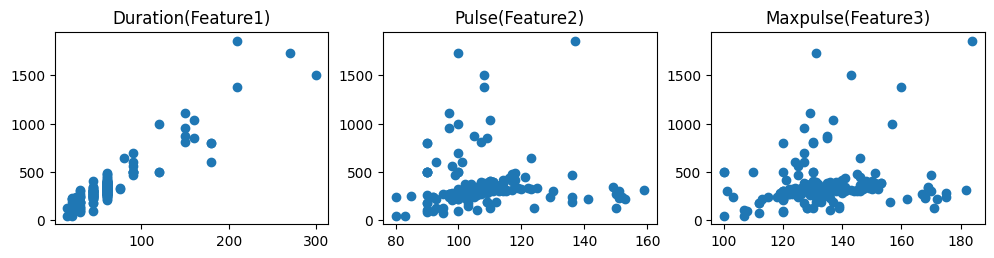

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df_new['Duration'], df_new['Calories'])
ax1.set_title("Duration(Feature1)")
ax2.scatter(df_new['Pulse'], df_new['Calories'])
ax2.set_title("Pulse(Feature2)")
ax3.scatter(df_new['Maxpulse'], df_new['Calories'])
ax3.set_title("Maxpulse(Feature3)")

plt.show()